In [1]:
#Import packages we will need for our analysis 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Load our Data Set into a data frame
isp = pd.read_csv('cleaned_data.csv')

In [3]:
# Do a quick check on the Data set. Records and Variables do we have4? What does the data look like?
print(isp.shape)
pd.set_option('display.max_columns', None) # ensure we can see the full data set
isp.head()

(208453, 20)


,record_id,restaurant_name,borough,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,date_of_data_pull,inspection_type,latitude,longitude
0,41503108,TULCINGO RESTAURANT,Queens,40364040,NATIONAL STREET,NaN,7186398880,Mexican,2023-09-26,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,26.0,NaN,NaN,11/12/2023,Cycle Inspection / Initial Inspection,0.000000,0.000000
1,50135598,United Chinese Association of Brooklyn,Brooklyn,1787,STILLWELL AVENUE,11223.0,7182320055,NaN,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.602887,-73.986424
2,50139946,CHEZ OMAR,Manhattan,394,WEST STREET,10014.0,9175606080,NaN,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.733028,-74.010284
3,50126672,NaN,0,2,SHADY BROOK LN,8512.0,6097997555,NaN,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,NaN,NaN
4,50107357,NaN,Queens,29-21,ASTORIA BOULEVARD,11102.0,3478080747,NaN,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.770403,-73.919343


In [4]:
isp.grade.value_counts()

A    70938
B    11370
N     8640
C     6684
Z     3929
P      567
Name: grade, dtype: int64

In [5]:
grade_by_boro = pd.crosstab(isp.grade, isp.borough, margins = True)
grade_by_boro

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
grade,,,,,,
A,6022,18368,27001,16623,2924,70938
B,1152,3032,3922,2876,388,11370
C,524,1801,2379,1847,133,6684
N,777,1964,3379,2228,292,8640
P,45,163,212,134,13,567
Z,487,954,1207,1130,151,3929
All,9007,26282,38100,24838,3901,102128


Text(0.5, 1.0, 'Grade Distribution by Borough')

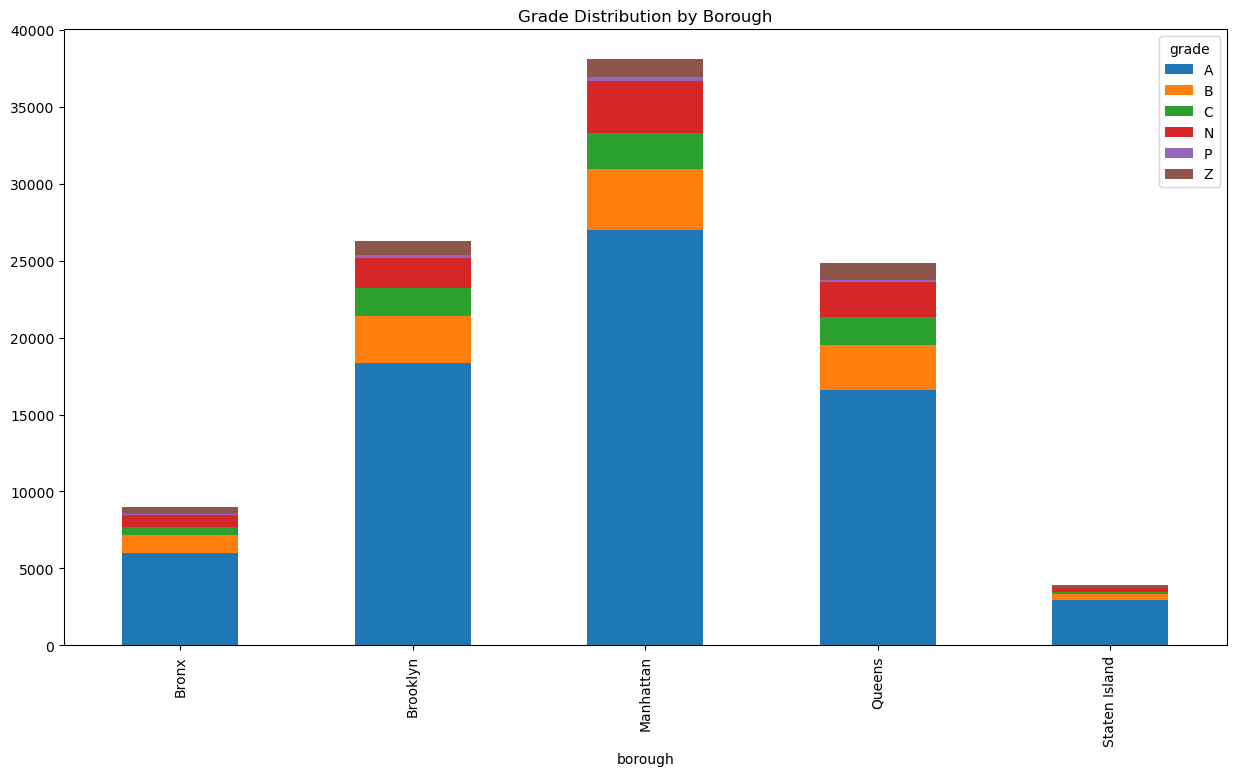

In [11]:
pd.crosstab(isp.borough, isp.grade).plot(kind = "bar", figsize = (15,8), stacked = True)
plt.title('Grade Distribution by Borough')